In [127]:
from sklearn.linear_model import LinearRegression
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

scenario = "hydrogenprice100"

In [128]:
sns.set_theme(style="whitegrid")
#path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow", "2050example")
path_to_results = os.path.join(os.path.dirname(os.path.dirname(os.getcwd()) ), "amiris_workflow" )
path_to_structure = os.path.join(path_to_results, "amiris_data_structure.xlsx")
path_to_load = os.path.join(path_to_results, "amiris-config", "data","load.csv")
path_to_output = os.path.join(path_to_results, "output","amiris_results.csv" )
path_to_storage_levels = os.path.join(path_to_results, "output","final_storage_levels.csv" )
path_to_generation = os.path.join(path_to_results, "output","hourly_generation_per_group.csv" )
path_to_electricity_prices = os.path.join(path_to_results, "output","raw","EnergyExchangeMulti.csv" )

path_to_plots = os.path.join(os.getcwd(),  "Scenarios", "AMIRIS", scenario )
if not os.path.exists(path_to_plots):
    os.makedirs(path_to_plots)
#-----------------------------------------------------------------------------
elec_prices_data = pd.read_csv(path_to_electricity_prices, sep=";")  
generation_data =  pd.read_csv(path_to_generation, index_col="Unnamed: 0")
load_data = pd.read_csv(path_to_load, sep=";", header=None) 
results_data = pd.read_csv(path_to_output) 
storage_levels_data = pd.read_csv(path_to_storage_levels) 
storages_data = pd.read_excel(path_to_structure, sheet_name='storages', index_col=0)
conventionals_data = pd.read_excel(path_to_structure, sheet_name='conventionals', index_col=0)
renewables_data = pd.read_excel(path_to_structure, sheet_name='renewables', index_col=0)
electrolysers_data = pd.read_excel(path_to_structure, sheet_name='electrolysers', index_col=0)
biogas_data = pd.read_excel(path_to_structure, sheet_name='biogas', index_col=0)
# Why is the electrolysis_hydrogen_generation given in the load generation? I think that value is not needed. 

In [129]:
print("Conventionals " + str(conventionals_data["InstalledPowerInMW"].sum()/1000))
print("Renewables " + str(renewables_data["InstalledPowerInMW"].sum()/1000))
print("electrolysers " + str(electrolysers_data["PeakConsumptionInMW"].sum()/1000))
print("biogas " + str(biogas_data["InstalledPowerInMW"].sum()/1000))
renewables_data

Conventionals 12.376
Renewables 115.327
electrolysers 41.071
biogas 0.0


,identifier,InstalledPowerInMW,OpexVarInEURperMWH,Set,SupportInstrument,FIT,Premium,Lcoe
0,99990300002,1,0.000000,OtherPV,NONE,-,-,-
1,99990200003,1,1.350000,WindOn,NONE,-,-,-
2,99990100007,1,3.000000,WindOff,NONE,-,-,-
3,20500200021,4000,1.404815,WindOn,NONE,-,-,-
4,20500300024,5500,0.000000,OtherPV,NONE,-,-,-


In [130]:
windoff = renewables_data[renewables_data["Set"] =="WindOff"]
print(windoff["InstalledPowerInMW"].sum())
windon = renewables_data[renewables_data["Set"] =="WindOn"]
print(windon["InstalledPowerInMW"].sum())
PV = renewables_data[renewables_data["Set"] =="OtherPV"]
print(PV["InstalledPowerInMW"].sum())
ROR = renewables_data[renewables_data["Set"] =="RunOfRiver"]
print(ROR["InstalledPowerInMW"].sum())

70001
12001
33284


In [131]:
windon_join = pd.merge(windon, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')

print(windon_join["PRODUCTION_IN_MWH"].sum()/1000000)
windoff_join = pd.merge(windoff, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(windoff_join["PRODUCTION_IN_MWH"].sum()/1000000)
PV_join = pd.merge(PV, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(PV_join["PRODUCTION_IN_MWH"].sum()/1000000)
ROR_join = pd.merge(ROR, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
print(ROR_join["PRODUCTION_IN_MWH"].sum()/1000000)

35.057862521637055
101.18531476607251
35.499283188


In [132]:
conventionals_join = pd.merge(conventionals_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
storages_results = pd.merge(storages_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results = pd.merge(electrolysers_data, 
                      results_data, 
                      on ='identifier', 
                      how ='inner')
electrolysers_results.head()

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502,5.016845e+08,1.271070e+09,1.717662e+07,NaN,7.693856e+08


In [133]:
storages = None
if storages != None:
    path_to_storages_raw = os.path.join(path_to_results, "output","raw","StorageTrader.csv")
    storages_raw = pd.read_csv(path_to_storages_raw, sep=";") 
    print("storages GW: " + str(storages_data["InstalledPowerInMW"].sum()/1000))
    storage_levels_data.head()
    storages_results["InstalledPowerInMW"].sum()
    #storage_levels_data["value"][1:].plot.scatter() # 
    storage_levels_data.reset_index().plot.scatter(x = 'index', y = 'value')
    production = storages_results['PRODUCTION_IN_MWH'].sum()
    discharging = generation_data["storages_discharging"].sum()
    charging = generation_data["storages_charging"].sum()
    print("production/discharging "+ str(production/discharging) )
    discharging/charging

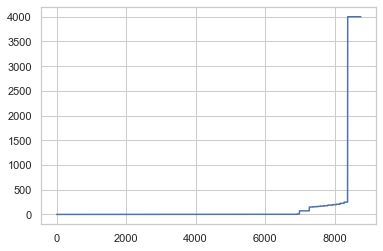

In [134]:
sorted_elec_prices = elec_prices_data["ElectricityPriceInEURperMWH"].copy()
#sorted_elec_prices.plot()
axs1 = sorted_elec_prices.sort_values(ignore_index=True).plot()
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'elec_prices.png', bbox_inches='tight', dpi=300)

In [135]:
elec_prices_data.head()

,AgentId,TimeStep,TotalAwardedPowerInMW,ElectricityPriceInEURperMWH,DispatchSystemCostInEUR
0,1,946080003,16921.589856,3.216406,42121.798068
1,1,946083603,16688.690025,3.216406,40556.151907
2,1,946087203,16290.179757,3.216406,38278.593591
3,1,946090803,16007.800126,3.216406,36255.064057
4,1,946094403,16088.635647,3.121812,35696.289281


In [136]:
electrolysers_results

,identifier,ElectrolyserType,PeakConsumptionInMW,ConversionFactor,HydrogenProductionTargetInMWH,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,99999999999,ELECTROLYSIS,41071,0.74,12901502,5.016845e+08,1.271070e+09,1.717662e+07,NaN,7.693856e+08


In [137]:
load_generation = pd.concat([generation_data, 
                      load_data],   axis=1 )
load_generation.drop(0, axis=1, inplace=True) # dropping timeseries
load_generation.rename(columns={1: "load" }, inplace=True)
# load_generation.sort_values(by=1, inplace=True) # sorting by increasing load
# load_generation.reset_index(inplace=True )
#load_generation.drop("index", axis=1, inplace=True)
load_generation.drop("electrolysis_hydrogen_generation", axis=1, inplace=True)
load_generation.head()

,res,conventionals,storages_discharging,storages_charging,storages_aggregated_level,load_shedding,electrolysis_power_consumption,load
0,16921.589856,0.0,0.0,0.0,0.0,0.0,330.0,16591.589856
1,16688.690025,0.0,0.0,0.0,0.0,0.0,330.0,16358.690025
2,16290.179757,0.0,0.0,0.0,0.0,0.0,330.0,15960.179757
3,16007.800126,0.0,0.0,0.0,0.0,0.0,340.0,15667.800126
4,16088.635647,0.0,0.0,0.0,0.0,0.0,340.0,15748.635647


In [138]:
load_generation["storages_charging"] = load_generation["storages_charging"]*-1
load_generation["electrolysis_power_consumption"] = load_generation["electrolysis_power_consumption"]*-1
load_generation.drop("storages_aggregated_level", axis=1, inplace=True)

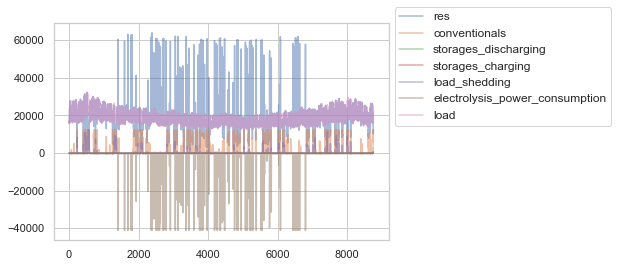

In [139]:
load_generation.plot(alpha=0.5)
axs1= plt.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1.1))
fig1 = axs1.get_figure()
fig1.savefig(path_to_plots + '/' + 'testing.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


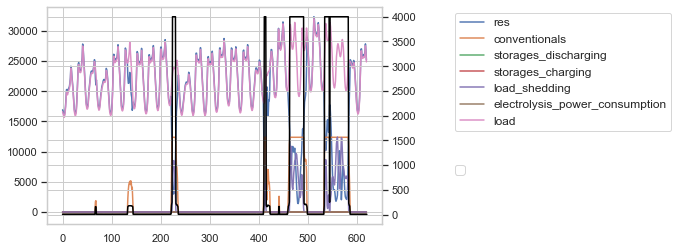

In [140]:
ElectricityPriceInEURperMWH = elec_prices_data["ElectricityPriceInEURperMWH" ]
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
load_generation.iloc[0:620,0:7].plot( ax=ax1, alpha=0.95)
#ax1.plot(load_generation.iloc[8740:8760,0:5] , alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[0:620] , color = "black")
ax2.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 0.3))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'timeseries.png', bbox_inches='tight', dpi=300)

In [141]:
# plt.stackplot( load_generation.index, load_generation.res, load_generation.conventionals, load_generation.load_shedding, load_generation.storages_discharging,
#               load_generation.storages_discharging,  labels=['RES', 'conventional', "load shedding", "dish", "charg"]  )


In [142]:
load_generation

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
0,16921.589856,0.000000,0.000000,-0.0,0.0,-330.0,16591.589856
1,16688.690025,0.000000,0.000000,-0.0,0.0,-330.0,16358.690025
2,16290.179757,0.000000,0.000000,-0.0,0.0,-330.0,15960.179757
3,16007.800126,0.000000,0.000000,-0.0,0.0,-340.0,15667.800126
4,16088.635647,0.000000,0.000000,-0.0,0.0,-340.0,15748.635647
...,...,...,...,...,...,...,...
8755,11634.074000,10526.916324,0.409156,-0.0,0.0,-0.0,22161.399480
8756,10956.061000,9848.406467,0.409156,-0.0,0.0,-0.0,20804.876623
8757,10722.056000,9181.958305,0.074124,-0.0,0.0,-0.0,19904.088428
8758,11482.071000,7636.198315,0.011929,-0.0,0.0,-0.0,19118.281243


In [143]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# storages_bids_discharge = storages_raw["OfferedDischargePriceInEURperMWH"].dropna()
# storages_bids_discharge.reset_index(drop=True, inplace = True)
# storages_bids_charge = storages_raw["OfferedChargePriceInEURperMWH"].dropna()
# storages_bids_charge.reset_index(drop=True, inplace = True)
# storages_bids_charge.sort_values(ignore_index=True).plot()

# AwardedDischargePowerInMWH = storages_raw["AwardedDischargePowerInMWH"].dropna()
# AwardedDischargePowerInMWH.reset_index(drop=True, inplace = True)
# plt.scatter(x = ElectricityPriceInEURperMWH , y= AwardedDischargePowerInMWH )
# plt.legend()
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("AwardedDischargePowerInMWH")
# plt.savefig(path_to_plots + '/' + 'DischargePowervsprices.png', bbox_inches='tight', dpi=300)


In [144]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# x = storages_bids_discharge.values.reshape(-1,1)
# y = storages_bids_charge.values.reshape(-1,1)
# regr = LinearRegression()
# regr.fit(x, y)
# fig = plt.scatter(x, y,  color='black')
# plt.plot(x, regr.predict(x), color='blue', linewidth=3)
# plt.xticks(())
# plt.yticks(())
# plt.xlabel("ElectricityPriceInEURperMWH")
# plt.ylabel("OfferedDischargePriceInEURperMWH")
# plt.legend()
# plt.show()
# print("Coefficients: \n", regr.coef_)


In [145]:
# this only work when there is one battery!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# fig, ax1 = plt.subplots()
# ax2 = ax1.twinx()
# storages_bids_discharge.loc[8500:8760].plot( ax=ax1, color = "blue")
# ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
# ax2.plot(ElectricityPriceInEURperMWH.loc[8500:8760] , color = "black")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


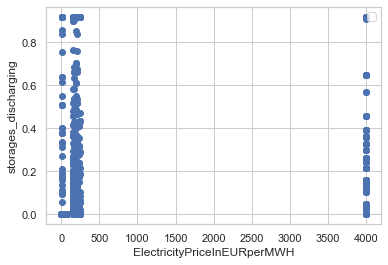

In [146]:
load_generation["storages_discharging"]
plt.scatter(x = ElectricityPriceInEURperMWH , y= load_generation["storages_discharging"] )
plt.legend()
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("storages_discharging")
plt.savefig(path_to_plots + '/' + 'BatteriesProductionvsPricesTimeseries.png', bbox_inches='tight', dpi=300)

storages_charging      -0.249450
storages_discharging    0.206541


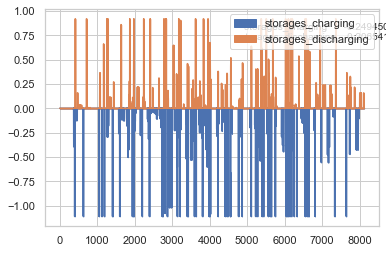

In [147]:
storages = load_generation[["storages_charging", "storages_discharging"]].copy()
sum_storages = storages.sum().divide(1000).to_string()
print(sum_storages)
ax1 = storages.iloc[0:8120,:].plot.area()
ax1.annotate(sum_storages,
               xy=(0.9, 0.8), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='top',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries.png', bbox_inches='tight', dpi=300)

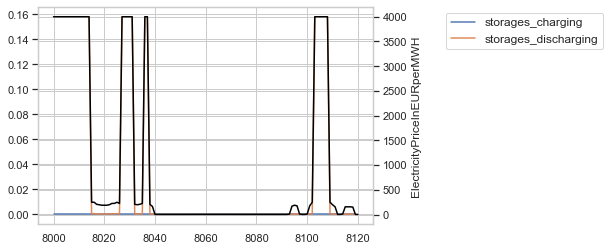

In [148]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
storages.iloc[8000:8120,:].plot( ax=ax1, alpha=0.95)
#load_generation.iloc[8000:8120,4].plot( ax=ax1, alpha=0.95)
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[8000:8120] , color = "black")
ax2.set_ylabel('ElectricityPriceInEURperMWH')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'storages_timeseries_short.png', bbox_inches='tight', dpi=300)

In [149]:
electrolysisPowerConsumptioninMWh  = load_generation["electrolysis_power_consumption"]

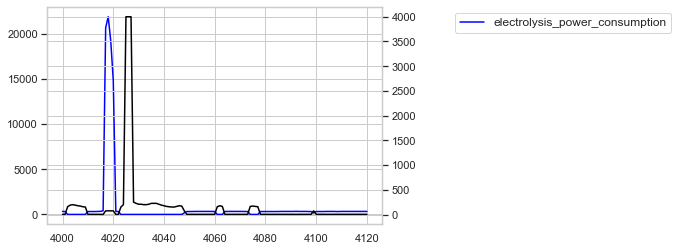

In [150]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
electrolysisPowerConsumptioninMWh = electrolysisPowerConsumptioninMWh*-1
electrolysisPowerConsumptioninMWh.loc[4000:4120].plot( ax=ax1, color = "blue")
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1.2, 1))
ax2.plot(ElectricityPriceInEURperMWH.loc[4000:4120] , color = "black")
plt.savefig(path_to_plots + '/' + 'H2vsPricesTimeseries.png', bbox_inches='tight', dpi=300)

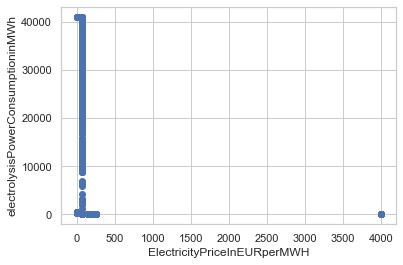

In [151]:
electricityPrice= ElectricityPriceInEURperMWH.values.reshape(-1,1)
electrolysisPower = electrolysisPowerConsumptioninMWh.values.reshape(-1,1)
fig = plt.scatter(electricityPrice, electrolysisPower)
plt.xlabel("ElectricityPriceInEURperMWH")
plt.ylabel("electrolysisPowerConsumptioninMWh")
plt.savefig(path_to_plots + '/' + 'H2vsPrices.png', bbox_inches='tight', dpi=300)

In [152]:
h2prices = pd.DataFrame(list(zip(ElectricityPriceInEURperMWH, electrolysisPowerConsumptioninMWh)),
              columns =['electricityPrice', 'electrolysisPower'])
h2prices.head()

,electricityPrice,electrolysisPower
0,3.216406,330.0
1,3.216406,330.0
2,3.216406,330.0
3,3.216406,340.0
4,3.121812,340.0


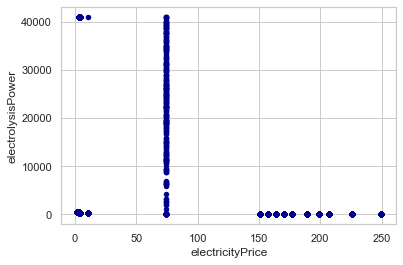

In [153]:
h2prices_filtered = h2prices[h2prices["electricityPrice"] < 4000]
ax1 = h2prices_filtered.plot.scatter(x='electricityPrice',
                       y='electrolysisPower',
                       c='DarkBlue')
plt.savefig(path_to_plots + '/' + 'H2vsPricesZoom.png', bbox_inches='tight', dpi=300)

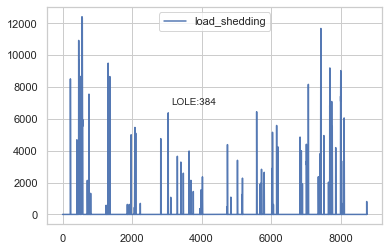

In [154]:
# LOLE
LOLE = len(h2prices[h2prices["electricityPrice"] == 4000].index)
ax1 = load_generation[["load_shedding"]].plot( alpha=0.95)
ax1.annotate("LOLE:" + str(LOLE),
               xy=(0.5, 0.5), xycoords='figure fraction',
               horizontalalignment='right', verticalalignment='bottom',
               fontsize='small')
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'load_shedding.png', bbox_inches='tight', dpi=300)

In [155]:
conventionals_join
#conventionals_join.loc[conventionals_join['FuelType'] =="HYDROGEN"]

,identifier,FuelType,OpexVarInEURperMWH,Efficiency,BlockSizeInMW,InstalledPowerInMW,VARIABLE_COSTS_IN_EURO,REVENUES_IN_EURO,CONSUMPTION_IN_MWH,PRODUCTION_IN_MWH,CONTRIBUTION_MARGIN_IN_EURO
0,2.050190e+10,NUCLEAR,4.162416,0.273770,484.0,484.0,9.007218e+06,8.546725e+08,NaN,8.714849e+05,8.456653e+08
1,2.046080e+10,NATURAL_GAS,4.547998,0.562874,1000.0,1000.0,2.152619e+08,1.735366e+09,NaN,1.426282e+06,1.520104e+09
2,2.042080e+10,NATURAL_GAS,4.732665,0.540695,1000.0,1000.0,2.075264e+08,1.719108e+09,NaN,1.320863e+06,1.511582e+09
3,2.038080e+10,NATURAL_GAS,4.924830,0.519389,1000.0,1000.0,1.990940e+08,1.702564e+09,NaN,1.217274e+06,1.503470e+09
4,2.034080e+10,NATURAL_GAS,5.124798,0.498923,1000.0,1000.0,1.902814e+08,1.685911e+09,NaN,1.117565e+06,1.495630e+09
5,2.040220e+10,NATURAL_GAS,5.172634,0.373561,1300.0,1300.0,1.598667e+08,2.047115e+09,NaN,7.082175e+05,1.887248e+09
6,2.030220e+10,NATURAL_GAS,5.713806,0.337842,1300.0,1300.0,1.395455e+08,2.011750e+09,NaN,5.590961e+05,1.872204e+09
7,2.037090e+10,NATURAL_GAS,4.974079,0.446760,1309.0,1309.0,2.207372e+08,2.153527e+09,NaN,1.165484e+06,1.932790e+09
8,2.032090e+10,NATURAL_GAS,5.227807,0.424864,1320.0,1320.0,1.997203e+08,2.138203e+09,NaN,1.002847e+06,1.938483e+09
9,2.028090e+10,NATURAL_GAS,5.440077,0.408123,1320.0,1320.0,1.783368e+08,2.109176e+09,NaN,8.601990e+05,1.930839e+09


In [156]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
conventional_production_from_generation = load_generation["conventionals"].sum()
a = conventional_production - conventional_production_from_generation

In [157]:
storages_data.head()

,identifier,StorageType,EnergyToPowerRatio,ChargingEfficiency,DischargingEfficiency,InitialEnergyLevelInMWH,InstalledPowerInMW
0,99992600008,STORAGE,5,0.9,0.92,0,1


In [158]:
conventional_production = conventionals_join["PRODUCTION_IN_MWH"].sum()
charging_from_generation = load_generation["storages_discharging"].sum()

In [159]:
#power consumed in MW
totalH2 = electrolysisPowerConsumptioninMWh.sum()
totalH2*0.74

12710700.81059267

In [160]:
# Input = TWh monthly12901502.5
Input = 12901502.5*12/0.74
print(Input/totalH2)

12.1801332835228


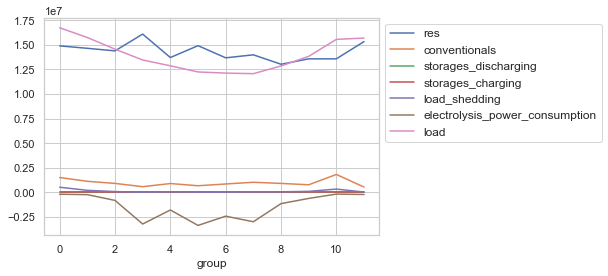

In [161]:
load_generation['group'] = (load_generation.index // 730)
grouped = load_generation.groupby(['group']).sum()
ax1 = grouped.plot()
ax1.legend(fontsize='medium', loc='upper left', bbox_to_anchor=(1, 1))
fig1 = ax1.get_figure()
fig1.savefig(path_to_plots + '/' + 'monthly_production.png', bbox_inches='tight', dpi=300)

In [162]:
grouped

,res,conventionals,storages_discharging,storages_charging,load_shedding,electrolysis_power_consumption,load
group,,,,,,,
0,1.489501e+07,1.510815e+06,11.929825,-14.444444,522945.719279,-1.898511e+05,1.673892e+07
1,1.464819e+07,1.123959e+06,16.996729,-20.491007,205561.358190,-2.329625e+05,1.574474e+07
2,1.438730e+07,9.096765e+05,17.102647,-21.210927,81327.036324,-8.181524e+05,1.456015e+07
3,1.609350e+07,5.761124e+05,14.954296,-18.525983,10757.046993,-3.219334e+06,1.346103e+07
4,1.371014e+07,8.968832e+05,18.607969,-22.147474,52249.073119,-1.791211e+06,1.286805e+07
5,1.491584e+07,6.724307e+05,18.978440,-22.449621,15863.647244,-3.361521e+06,1.224261e+07
6,1.368031e+07,8.518546e+05,14.363357,-17.238206,17591.403905,-2.422442e+06,1.212731e+07
7,1.398481e+07,1.025788e+06,21.842104,-26.264520,45609.292608,-2.987203e+06,1.206900e+07
8,1.302708e+07,9.105039e+05,24.751211,-30.807179,59149.969639,-1.145138e+06,1.285159e+07
